**Understanding & Visualizing Data**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import os
from sklearn import linear_model
import seaborn as sns

In [2]:
day_df = pd.read_csv(r"C:\Users\fastf\Downloads\bike+sharing+dataset\day.csv")


In [3]:
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# finding no. of null values in each column if presenet
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df['yr'].unique()

array([0, 1], dtype=int64)

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
#dropping dataframe columns which really doesn't matter for prediction
columnsToDrop= ['instant', 'casual', 'registered', 'atemp','dteday']
day_df.drop(columnsToDrop, axis=1, inplace=True)

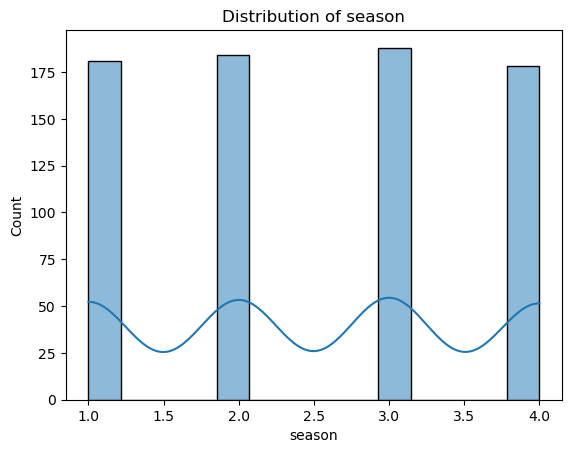

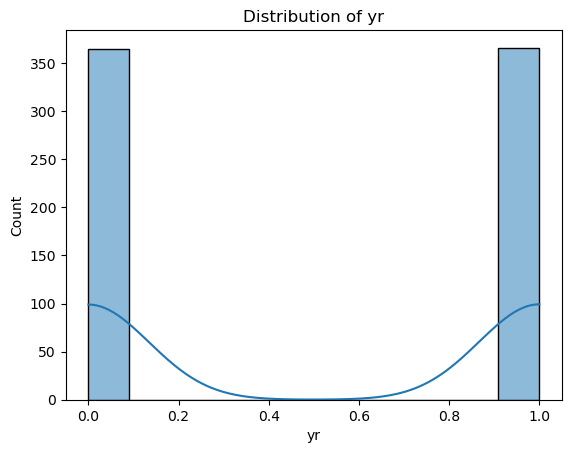

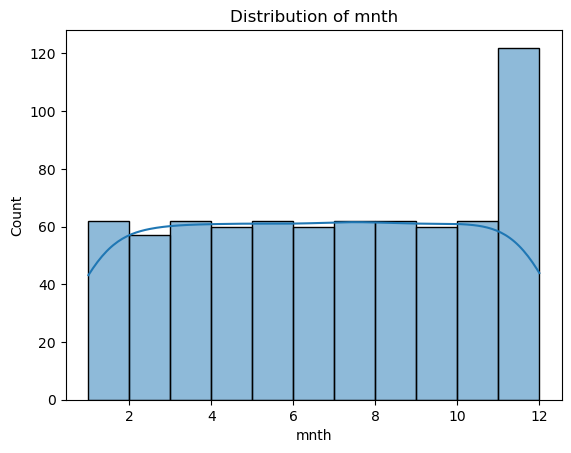

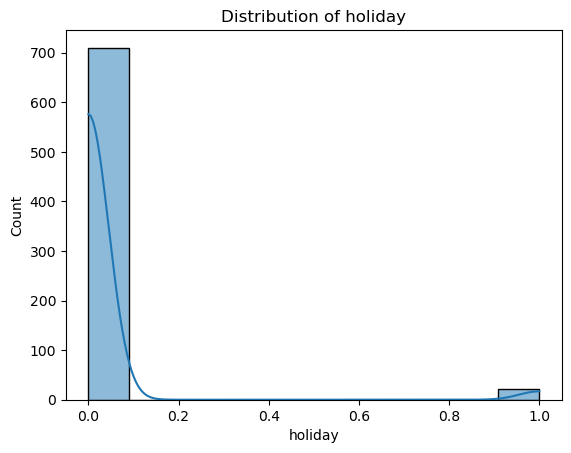

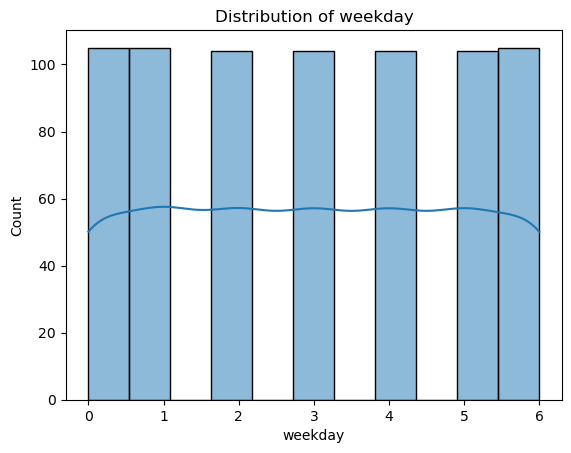

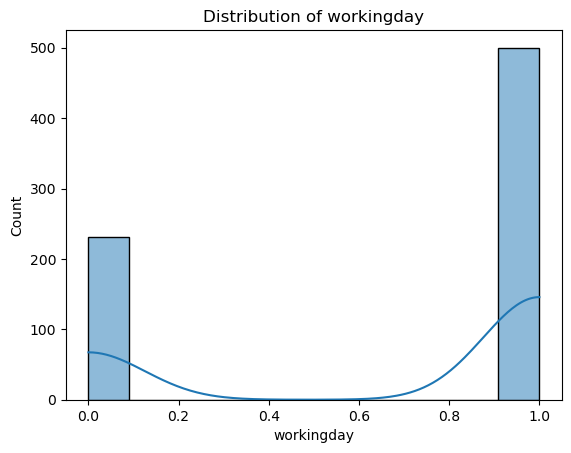

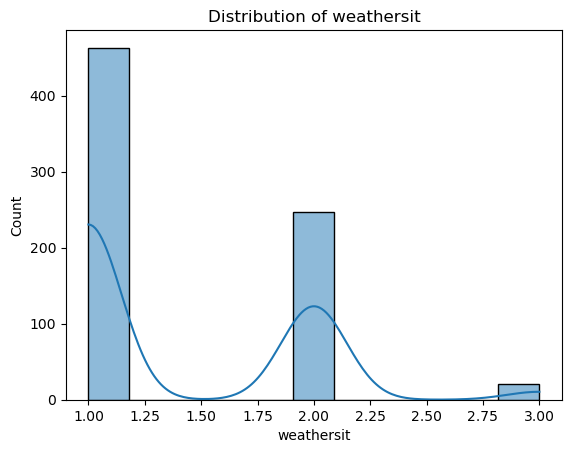

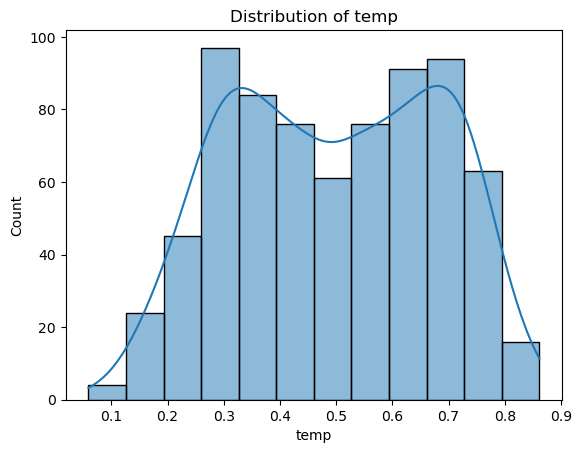

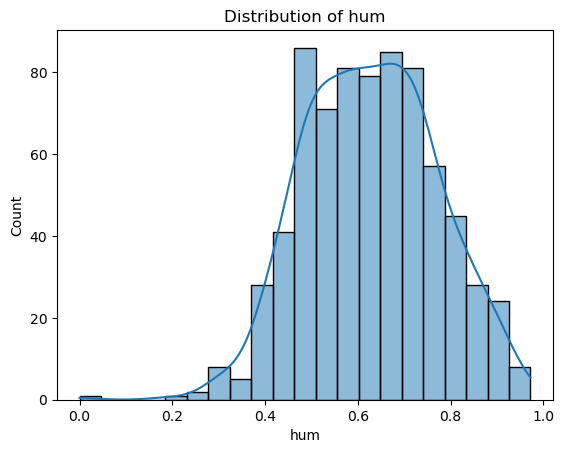

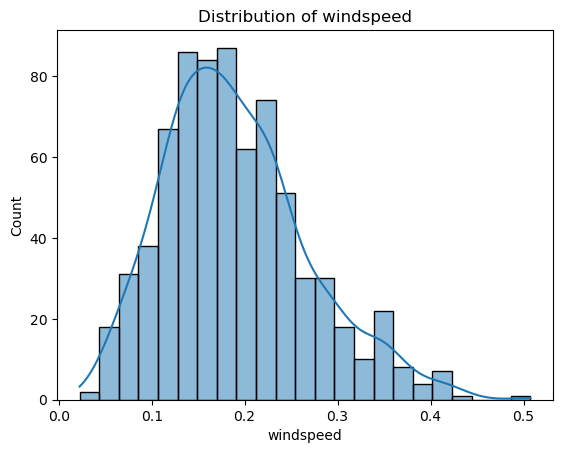

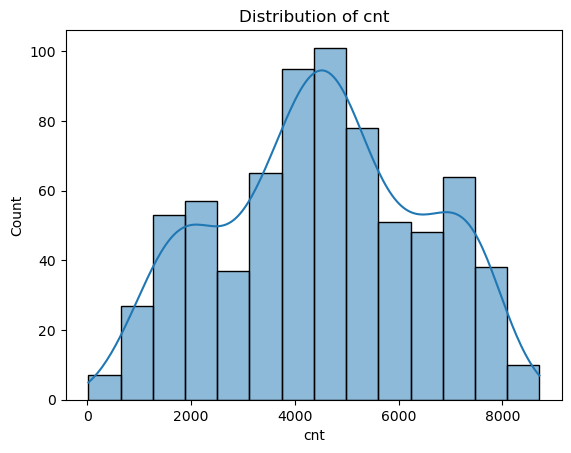

In [10]:
#visualizing distribution of data to analyze skewness & presence of outliers
columns = day_df.columns.values

for x in columns:
    sns.histplot(day_df[x], kde=True) 
    plt.title(f"Distribution of {x}")
    plt.show()


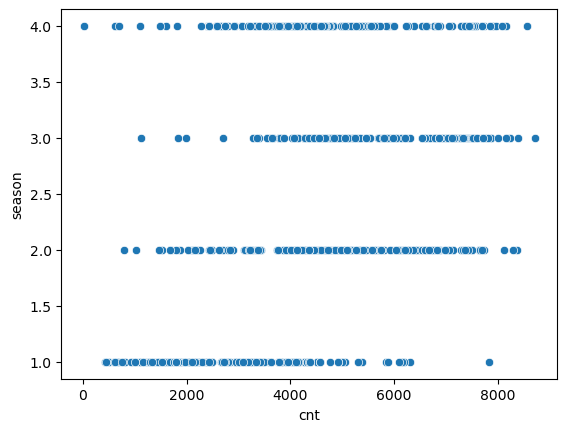

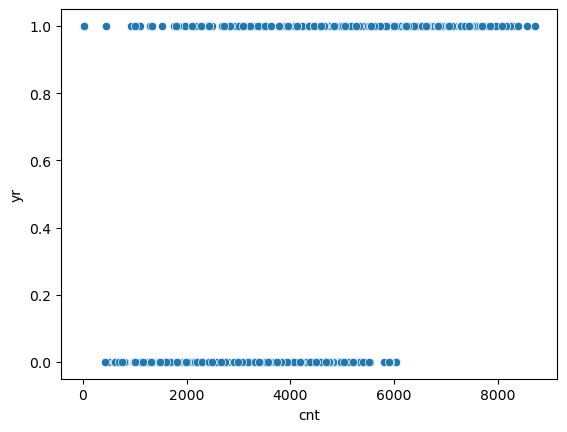

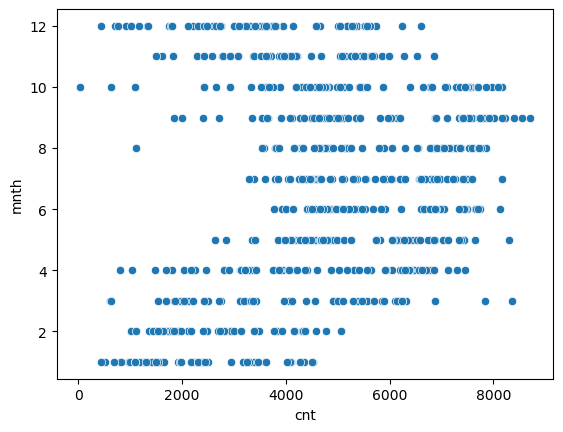

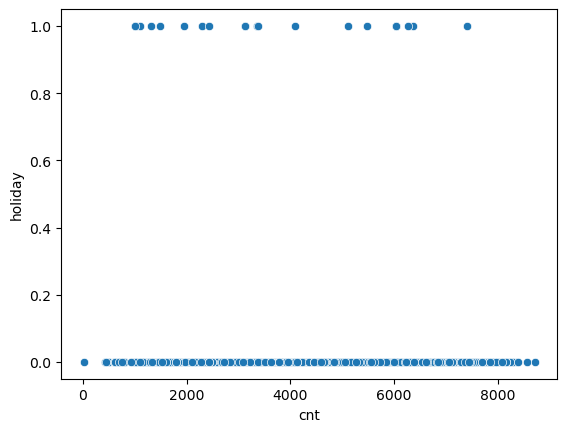

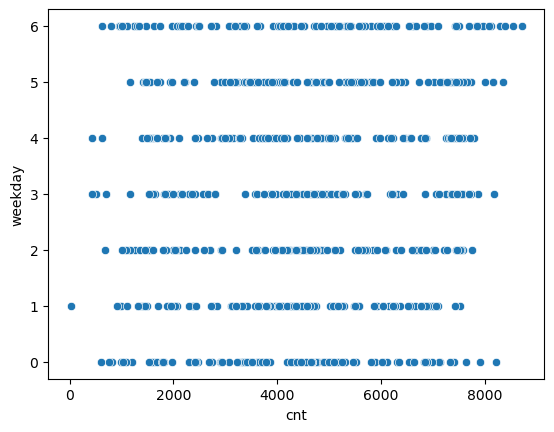

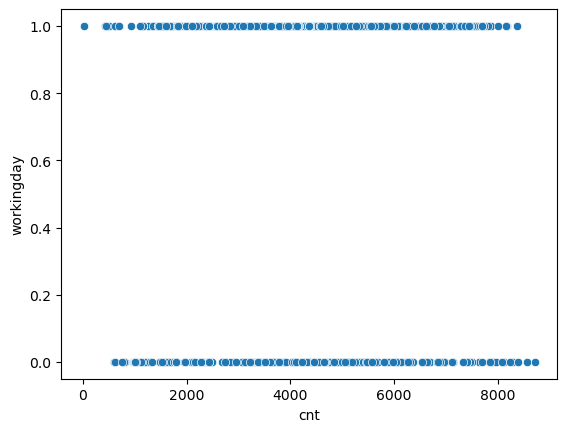

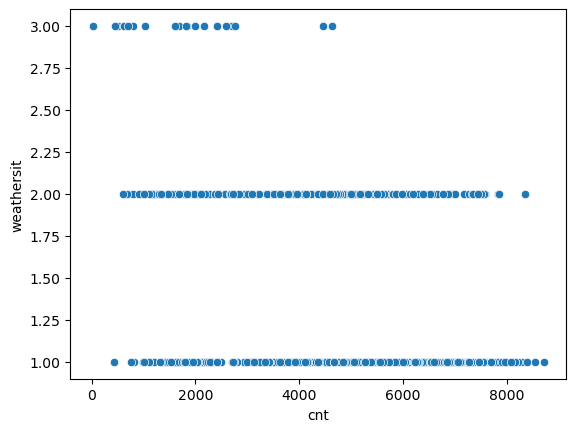

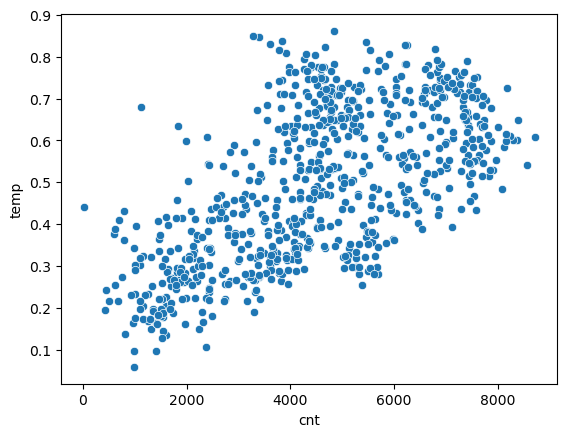

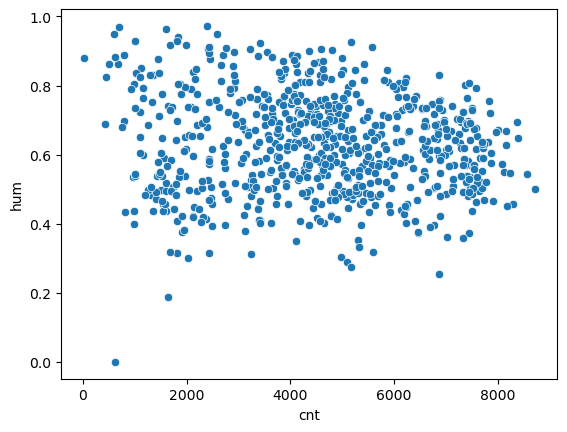

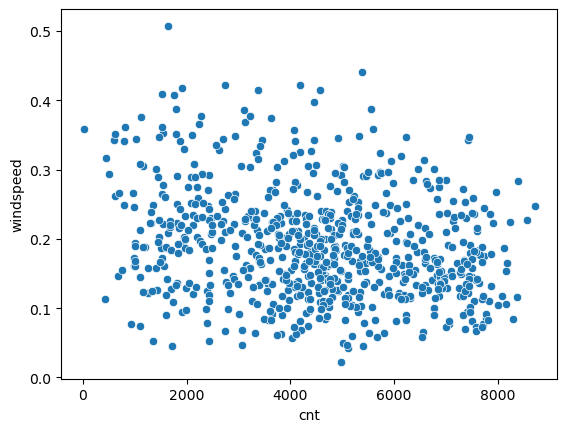

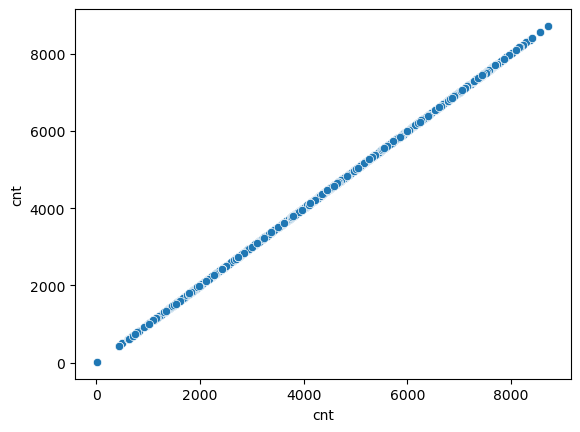

In [11]:
# visualizing relationship of variables with 'cnt'
for y in columns:
    sns.scatterplot(x='cnt', y=y, data= day_df)
    plt.show()

<Axes: >

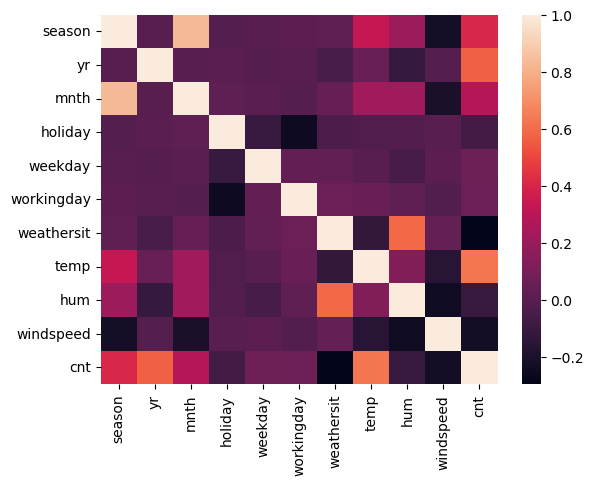

In [12]:
# correlation visualization using heatmap
sns.heatmap(day_df.corr())

**Model Scaling & Feature Engineering**


In [13]:
# using standard scaler to scale data as temp, hum & windspeed are close to normal distribution
# and these feature needs scaling as there ranges differ significantly
columnsToScale = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
day_df[columnsToScale]= scaler.fit_transform(day_df[columnsToScale])

In [14]:
day_df[columnsToScale].describe()

,temp,hum,windspeed
count,7.310000e+02,7.310000e+02,7.310000e+02
mean,-4.179663e-16,-9.914550e-16,-2.138432e-16
std,1.000685e+00,1.000685e+00,1.000685e+00
min,-2.384871e+00,-4.411486e+00,-2.170506e+00
25%,-8.653855e-01,-7.580469e-01,-7.171066e-01
50%,1.611698e-02,-8.621154e-03,-1.228127e-01
75%,8.748452e-01,7.188453e-01,5.517254e-01
max,2.002355e+00,2.421148e+00,4.092936e+00


In [15]:
#creating a new feature daycount
day_df['dayCount'] = pd.Series(range(day_df.shape[0]))

In [16]:
train_set, test_set = train_test_split(day_df, train_size=0.7)
train_set.sort_values('dayCount', axis=0, inplace= True)
test_set.sort_values('dayCount', axis=0, inplace= True)

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor




In [19]:
trainingCols= train_set.drop(['cnt'], axis=1)
trainingLabels= train_set['cnt']
lin_reg = LinearRegression()
dec_reg = DecisionTreeRegressor(random_state=42)

In [20]:
lin_reg.fit(trainingCols, trainingLabels)
dec_reg.fit(trainingCols, trainingLabels)


DecisionTreeRegressor(random_state=42)

In [21]:
lin_predictions = lin_reg.predict(trainingCols)
dec_predictions = dec_reg.predict(trainingCols)


**Model Selection using cross validation**


In [22]:
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(dt_mae_scores)

dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(dt_mse_scores)

Scores: [ 621.48076923  458.15686275  460.21568627  589.60784314  868.78431373
 1112.41176471 1102.90196078  738.          675.82352941 1553.80392157]
Mean: 818.1186651583711
Standard deviation: 329.6554813594133
Scores: [ 768.55850335  546.69803832  552.55958777  853.04173173 1208.27178477
 1397.39642361 1389.13238545  904.87071983  920.77790003 1981.96365294]
Mean: 1052.3270727803276
Standard deviation: 422.5836802910616


In [23]:
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(lr_mae_scores)

lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(lr_mse_scores)

Scores: [ 401.58285976  649.9651503   888.266831    479.75003562  569.25978101
  700.0607375   870.19324576  971.53632414  654.71976269 1038.11226364]
Mean: 722.3446991412358
Standard deviation: 201.66278633629705
Scores: [ 496.55914452  790.85450552 1128.74059528  613.39300262  739.23538342
  863.9543749  1039.83992727 1260.21074189  794.87270567 1401.40982609]
Mean: 912.9070207177585
Standard deviation: 273.20180754364054


In [24]:
forest_reg = RandomForestRegressor()

rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_absolute_error", cv=10)
display_scores(rf_mae_scores)

rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, scoring="neg_mean_squared_error", cv=10))
display_scores(rf_mse_scores)

Scores: [ 722.03519231  329.17058824  372.46960784  547.71490196  656.05862745
  750.45941176  691.74529412  634.92745098  525.68137255 1283.54098039]
Mean: 651.3803427601808
Standard deviation: 249.90294784886797
Scores: [ 838.05206264  398.09943074  491.29697223  671.42862605  963.66600081
  904.76067959  864.87148216  801.7669028   737.42362978 1925.90288706]
Mean: 859.7268673858089
Standard deviation: 394.0397317367179


In [25]:
gbr_reg = GradientBoostingRegressor(random_state=42)
gbr_mae_scores = -cross_val_score(gbr_reg, trainingCols, trainingLabels,
                                  scoring="neg_mean_absolute_error", cv=10)
display_scores(gbr_mae_scores)
gbr_mse_scores = np.sqrt(-cross_val_score(gbr_reg, trainingCols, trainingLabels,
                                          scoring="neg_mean_squared_error", cv=10))
display_scores(gbr_mse_scores)

Scores: [ 670.35542051  313.55687951  272.32906702  391.23935377  651.37566208
  700.70981187  782.42771517  542.46283399  448.69268995 1495.86050564]
Mean: 626.9009939523671
Standard deviation: 332.49728249815485
Scores: [ 779.98617929  370.57111218  375.06437129  499.31134457  939.67195111
  861.75926372  994.06901983  686.02242969  650.74852716 1952.65660055]
Mean: 810.9860799398275
Standard deviation: 433.526944001294


**Model Fine-Tuning**

In [26]:
# from above gradient boosting regressor seems to be best for data.
# Now find the best hyperparameters for gradient boosting regressor

from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [40,100,120,150], 'max_features':[8,10,12], 'max_depth':[15,28]}]
grid_search = GridSearchCV(gbr_reg, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(trainingCols, trainingLabels)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid=[{'max_depth': [15, 28], 'max_features': [8, 10, 12],
                          'n_estimators': [40, 100, 120, 150]}],
             scoring='neg_mean_squared_error')

In [27]:
grid_search.best_params_

{'max_depth': 15, 'max_features': 8, 'n_estimators': 150}

In [28]:
feature_importances = grid_search.best_estimator_
print(feature_importances)

GradientBoostingRegressor(max_depth=15, max_features=8, n_estimators=150,
                          random_state=42)


In [29]:
final_model = GradientBoostingRegressor(max_depth=28, max_features=10, n_estimators=150,
                          random_state=42)

**Final Prediction**

In [30]:
#predicting values from test_set and evaluating model using RMSE error
test_set.sort_values(by='dayCount', axis=0, inplace=True)
test_x_cols = (test_set.drop('cnt', axis=1)).columns.values
test_y_cols = 'cnt'
X_test = test_set[test_x_cols]
y_test = test_set[test_y_cols]

In [31]:
final_model.fit(trainingCols, trainingLabels)
test_set['predictedCounts_test']= final_model.predict(X_test)
mse= mean_squared_error(y_test, test_set['predictedCounts_test'])
final_mse= np.sqrt(mse)
print(final_mse)

801.877765113275


**Final Visualization Using Scatter plot and**

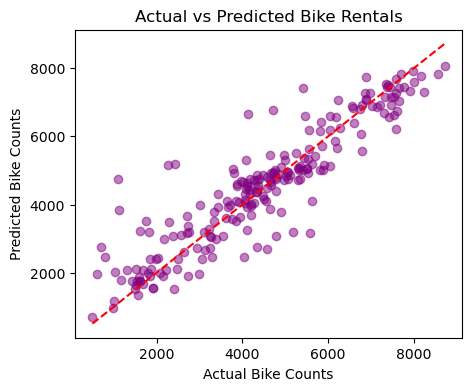

In [32]:
plt.figure(figsize=(5,4))
plt.scatter(y_test, test_set['predictedCounts_test'], alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect predictions line
plt.xlabel("Actual Bike Counts")
plt.ylabel("Predicted Bike Counts")
plt.title("Actual vs Predicted Bike Rentals")
plt.show()


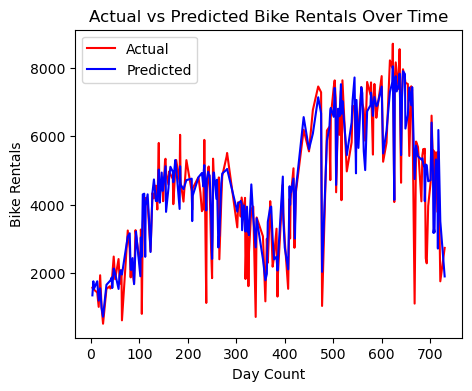

In [33]:
comparison_df = test_set[['dayCount', 'cnt', 'predictedCounts_test']].copy()
comparison_df = comparison_df.sort_values(by='dayCount')

plt.figure(figsize=(5,4))
sns.lineplot(x='dayCount', y='cnt', data=comparison_df, label='Actual', color='red')
sns.lineplot(x='dayCount', y='predictedCounts_test', data=comparison_df, label='Predicted', color='blue')
plt.xlabel('Day Count')
plt.ylabel('Bike Rentals')
plt.title('Actual vs Predicted Bike Rentals Over Time')
plt.legend()
plt.show()


In [34]:
X = day_df.drop(['cnt'], axis=1)
X = pd.get_dummies(X, drop_first=True)  
y = day_df['cnt']
feature_names = X.columns
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

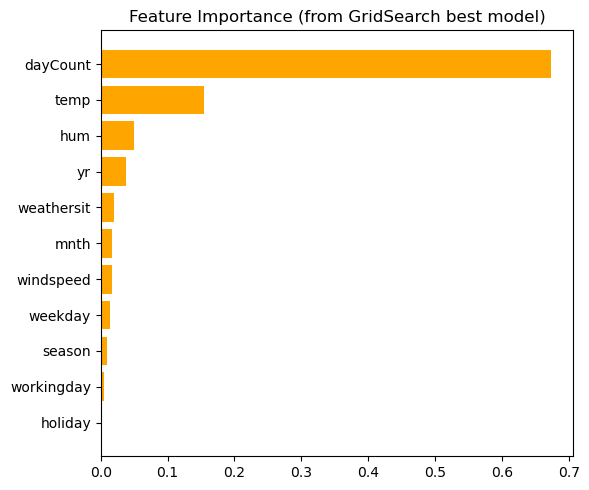

In [35]:

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(6, 5))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='orange')
plt.title('Feature Importance (from GridSearch best model)')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


X = day_df.drop(columns=['cnt', 'dayCount']) 
y = day_df['cnt']                            
date = day_df['dayCount']                    

X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(
    X, y, date, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


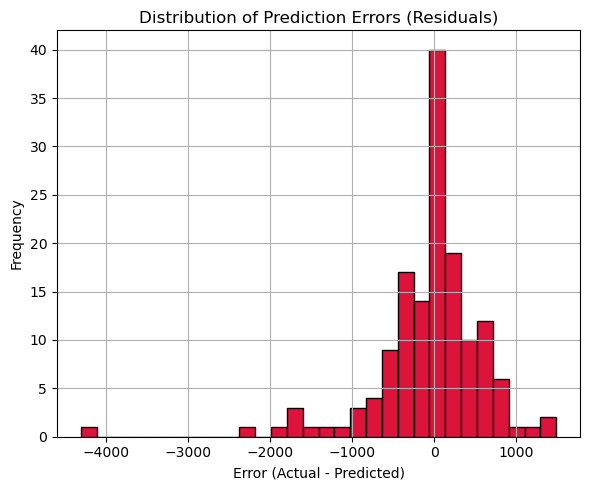

In [37]:
y_pred = model.predict(X_test)
errors = y_test.reset_index(drop=True) - y_pred
plt.figure(figsize=(6, 5))
plt.hist(errors, bins=30, color='crimson', edgecolor='black')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()